In [24]:
## for reference https://www.freecodecamp.org/news/how-to-build-your-first-neural-network-to-predict-house-prices-with-keras-f8db83049159/

In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('housepricedata.csv')

In [16]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [14]:
df["AboveMedianPrice"].value_counts()

0    732
1    728
Name: AboveMedianPrice, dtype: int64

In [19]:
dataset = df.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [20]:
X = dataset[:,:10]
X

array([[ 8450,     7,     5, ...,     8,     0,   548],
       [ 9600,     6,     8, ...,     6,     1,   460],
       [11250,     7,     5, ...,     6,     1,   608],
       ...,
       [ 9042,     7,     9, ...,     9,     2,   252],
       [ 9717,     5,     6, ...,     5,     0,   240],
       [ 9937,     5,     6, ...,     6,     0,   276]], dtype=int64)

In [22]:
y = dataset[:,-1]
y

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [23]:
from sklearn import preprocessing

In [25]:
min_max_scalar = preprocessing.MinMaxScaler()
X_scale = min_max_scalar.fit_transform(X)
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [26]:
from sklearn.model_selection import train_test_split

In [28]:
# for traning, testing and validating
X_train, X_val_and_test, y_train, y_val_and_test = train_test_split(X_scale, y, test_size=0.3)

In [30]:
# different dataset for testing and validating
X_val, X_test, y_val, y_test = train_test_split(X_val_and_test, y_val_and_test, test_size=0.5)

In [33]:
# X_train (10 input features, 70% of full dataset)
# X_val (10 input features, 15% of full dataset)
# X_test (10 input features, 15% of full dataset)
# Y_train (1 label, 70% of full dataset)
# Y_val (1 label, 15% of full dataset)
# Y_test (1 label, 15% of full dataset)
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [34]:
from keras.models import Sequential
from keras.layers import Dense

In [55]:
model = Sequential([
    Dense(32, activation="relu", input_shape=(10,)),
    Dense(32, activation="relu"),
    Dense(1, activation="sigmoid")
])

In [56]:
model.compile(optimizer="sgd",
              loss="binary_crossentropy",
              metrics=['accuracy']
)

In [57]:
hist = model.fit(X_train, y_train,
         batch_size=32,epochs=100,
         validation_data=(X_val, y_val))

Epoch 1/100
32/32 [==============================] - 1s 13ms/step - loss: 0.6856 - accuracy: 0.5440 - val_loss: 0.6802 - val_accuracy: 0.5753
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6801 - accuracy: 0.6135 - val_loss: 0.6752 - val_accuracy: 0.6758
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6751 - accuracy: 0.6742 - val_loss: 0.6702 - val_accuracy: 0.7489
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6700 - accuracy: 0.7241 - val_loss: 0.6650 - val_accuracy: 0.8219
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6647 - accuracy: 0.7828 - val_loss: 0.6594 - val_accuracy: 0.8447
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6593 - accuracy: 0.7955 - val_loss: 0.6541 - val_accuracy: 0.8584
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6541 - accuracy: 0.8102 - val_loss: 0.6488 - val_accuracy: 0.8584
Epoch 8/100


Epoch 59/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3129 - accuracy: 0.8826 - val_loss: 0.2859 - val_accuracy: 0.8995
Epoch 60/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3113 - accuracy: 0.8836 - val_loss: 0.2796 - val_accuracy: 0.9132
Epoch 61/100
32/32 [==============================] - 0s 5ms/step - loss: 0.3086 - accuracy: 0.8855 - val_loss: 0.2773 - val_accuracy: 0.9132
Epoch 62/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3070 - accuracy: 0.8845 - val_loss: 0.2749 - val_accuracy: 0.9132
Epoch 63/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3048 - accuracy: 0.8806 - val_loss: 0.2747 - val_accuracy: 0.9132
Epoch 64/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3029 - accuracy: 0.8806 - val_loss: 0.2744 - val_accuracy: 0.9087
Epoch 65/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3012 - accuracy: 0.8836 - val_loss: 0.2716 - val_accuracy: 0.9132
Epoch 

In [58]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.3235 - accuracy: 0.8447


[0.3234640061855316, 0.844748854637146]

In [59]:
import matplotlib.pyplot as plt

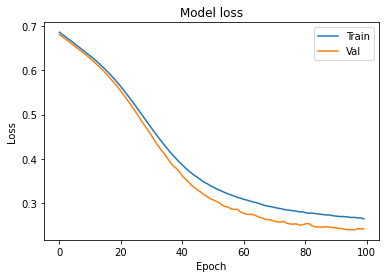

In [61]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

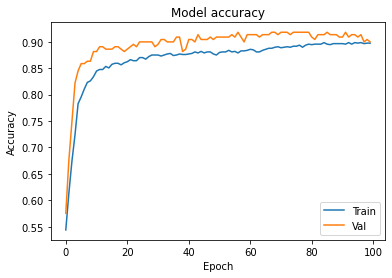

In [64]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()